In [1]:
import netCDF4
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
%matplotlib inline

In [2]:
# 1. Global Earthquakes
ds = pd.read_csv("usgs_earthquakes.csv")
ds.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


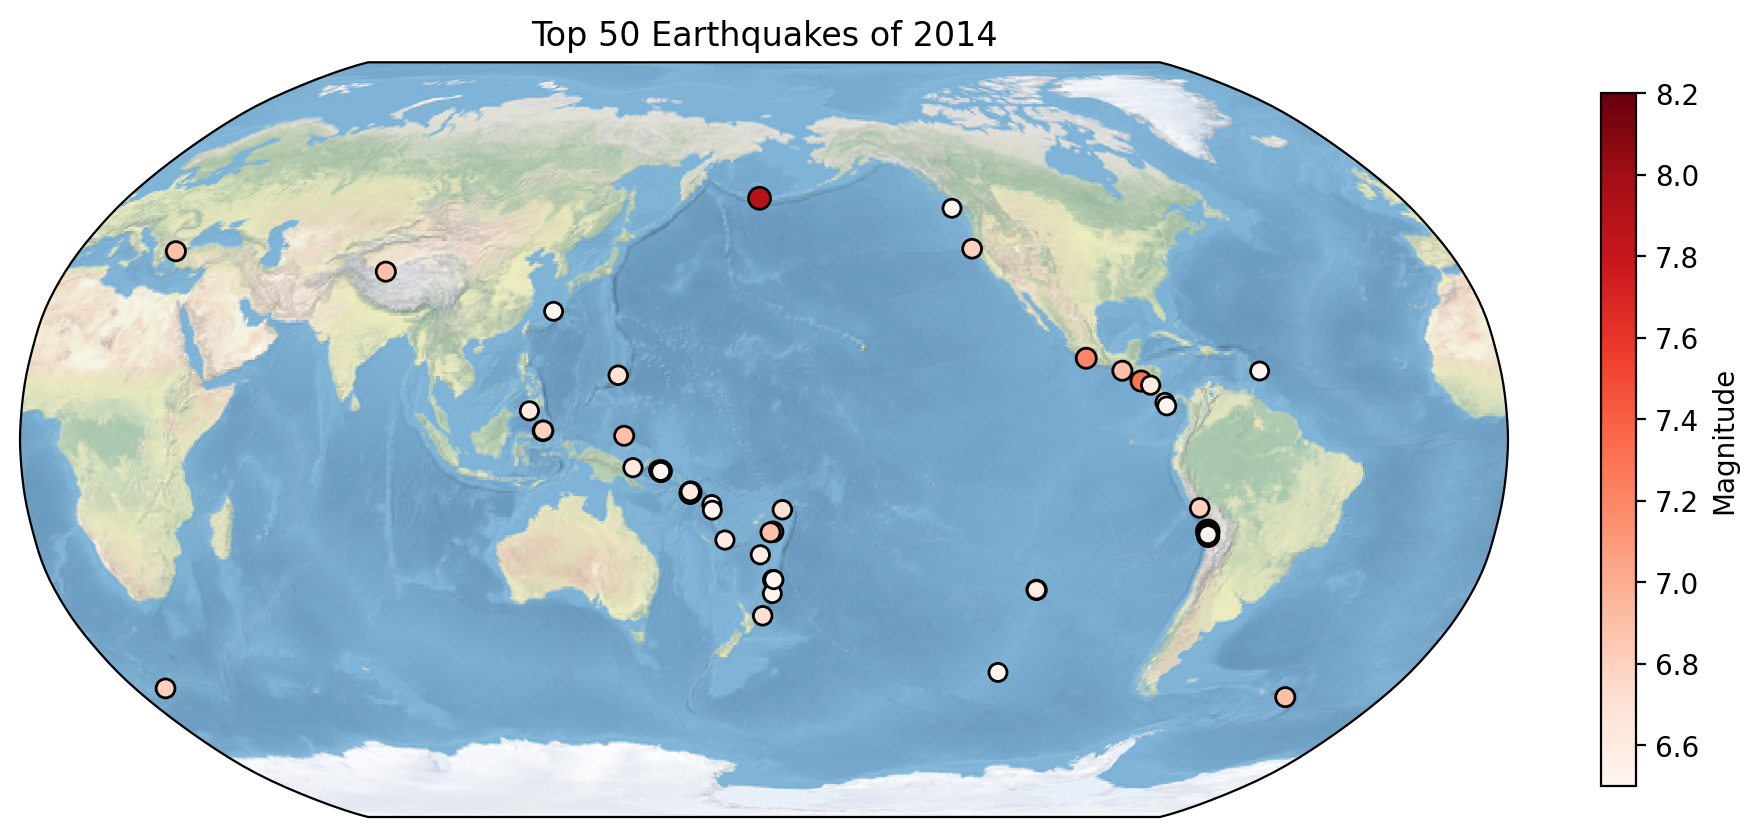

In [6]:
plt.figure(figsize=(12, 9),dpi=200)
proj = ccrs.Robinson(central_longitude=180, globe=None)
ax = plt.axes(projection=proj)
ax.stock_img()
# got inspired in https://www.cnblogs.com/youxiaogang/p/14262751.html
ax.set_global()

top_50_earthquakes = ds.nlargest(50, 'mag')
lons = top_50_earthquakes['longitude'].values
lats = top_50_earthquakes['latitude'].values
magnitudes = top_50_earthquakes['mag'].values

sc = ax.scatter(lons, lats, s=magnitudes**2, c=magnitudes, edgecolor='black', cmap='Reds', transform=ccrs.PlateCarree())

plt.colorbar(sc, label='Magnitude', shrink=0.5)
plt.title('Top 50 Earthquakes of 2014')
plt.show()

In [3]:
# 2.Explore a netCDF dataset
# 2.1
data = xr.open_dataset("MERRA2_400.tavgU_2d_aer_Nx.202309.nc4", engine="netcdf4")
data

<xarray.Dataset>
Dimensions:    (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time       (time) datetime64[ns] 2023-09-01T00:30:00 ... 2023-09-01T23:30:00
Data variables: (12/50)
    BCANGSTR   (time, lat, lon) float32 ...
    BCCMASS    (time, lat, lon) float32 ...
    BCEXTTAU   (time, lat, lon) float32 ...
    BCFLUXU    (time, lat, lon) float32 ...
    BCFLUXV    (time, lat, lon) float32 ...
    BCSCATAU   (time, lat, lon) float32 ...
    ...         ...
    SUFLUXU    (time, lat, lon) float32 ...
    SUFLUXV    (time, lat, lon) float32 ...
    SUSCATAU   (time, lat, lon) float32 ...
    TOTANGSTR  (time, lat, lon) float32 ...
    TOTEXTTAU  (time, lat, lon) float32 ...
    TOTSCATAU  (time, lat, lon) float32 ...
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Thu Oct 12 07...
    Filename:                          MERRA2_400.tavgU_2d_aer_Nx.202309.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p38_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/KPUMVXFEQLA1
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

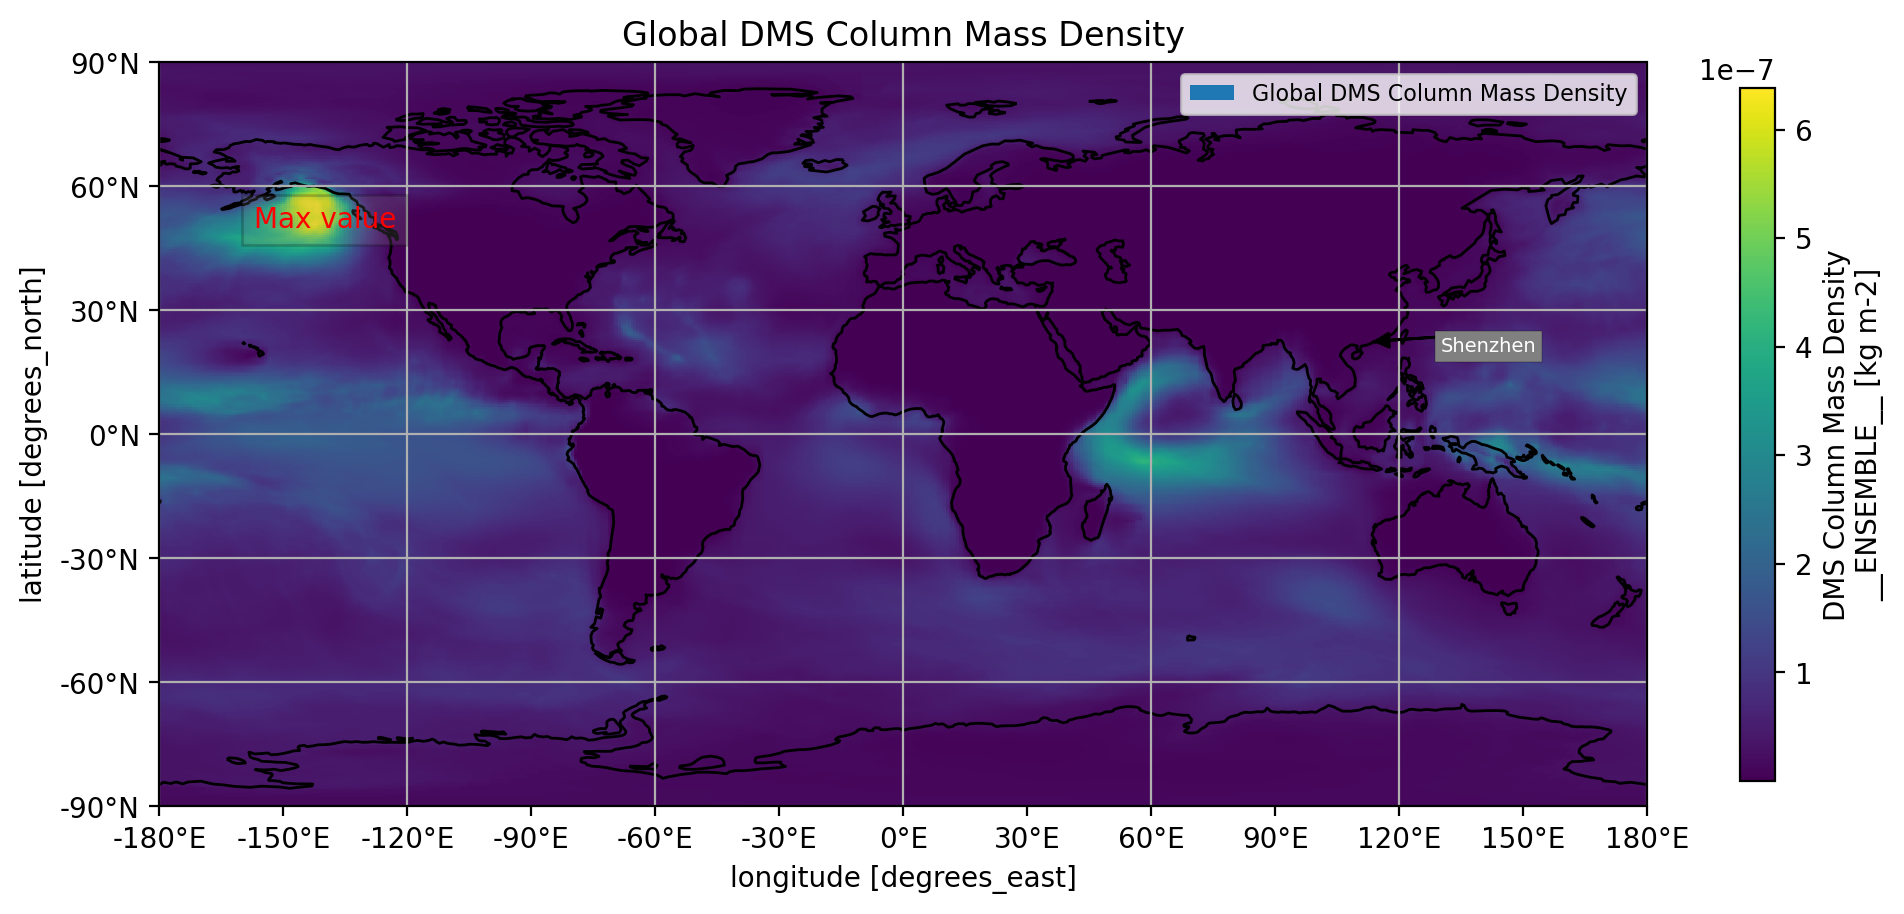

In [4]:
plt.figure(figsize=(12, 9),dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Add projection
Value = data.DMSCMASS.groupby('time.month')
Value.mean(dim=['time']).plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.5})

# Add gridlines, x label and ticks, y label and ticks
ax.gridlines()
ax.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(plt.FixedFormatter(['{}°E'.format(i) for i in range(-180, 181, 30)]))
ax.yaxis.set_major_formatter(plt.FixedFormatter(['{}°N'.format(i) for i in range(-90, 91, 30)]))

# Add title
plt.title('Global DMS Column Mass Density')

# Add annotate
ax.annotate('Shenzhen',xy=(114.06,22.54),xytext=(130,20),
             bbox=dict(boxstyle='square', fc='grey',linewidth=0.1),
             arrowprops=dict(facecolor='black', width=0.01,headwidth=5, headlength=5,shrink=0.005), 
             fontsize=7, color='white', horizontalalignment='left',
             transform=ccrs.PlateCarree())
# Add text
plt.text(-140, 50, 'Max value', size = 10,
        horizontalalignment='center', color='red',
        bbox=dict(facecolor="grey",alpha=0.2),
        transform=ccrs.PlateCarree())

# Add legend
plt.legend(['Global DMS Column Mass Density'],loc='best',fontsize=8)

plt.show()

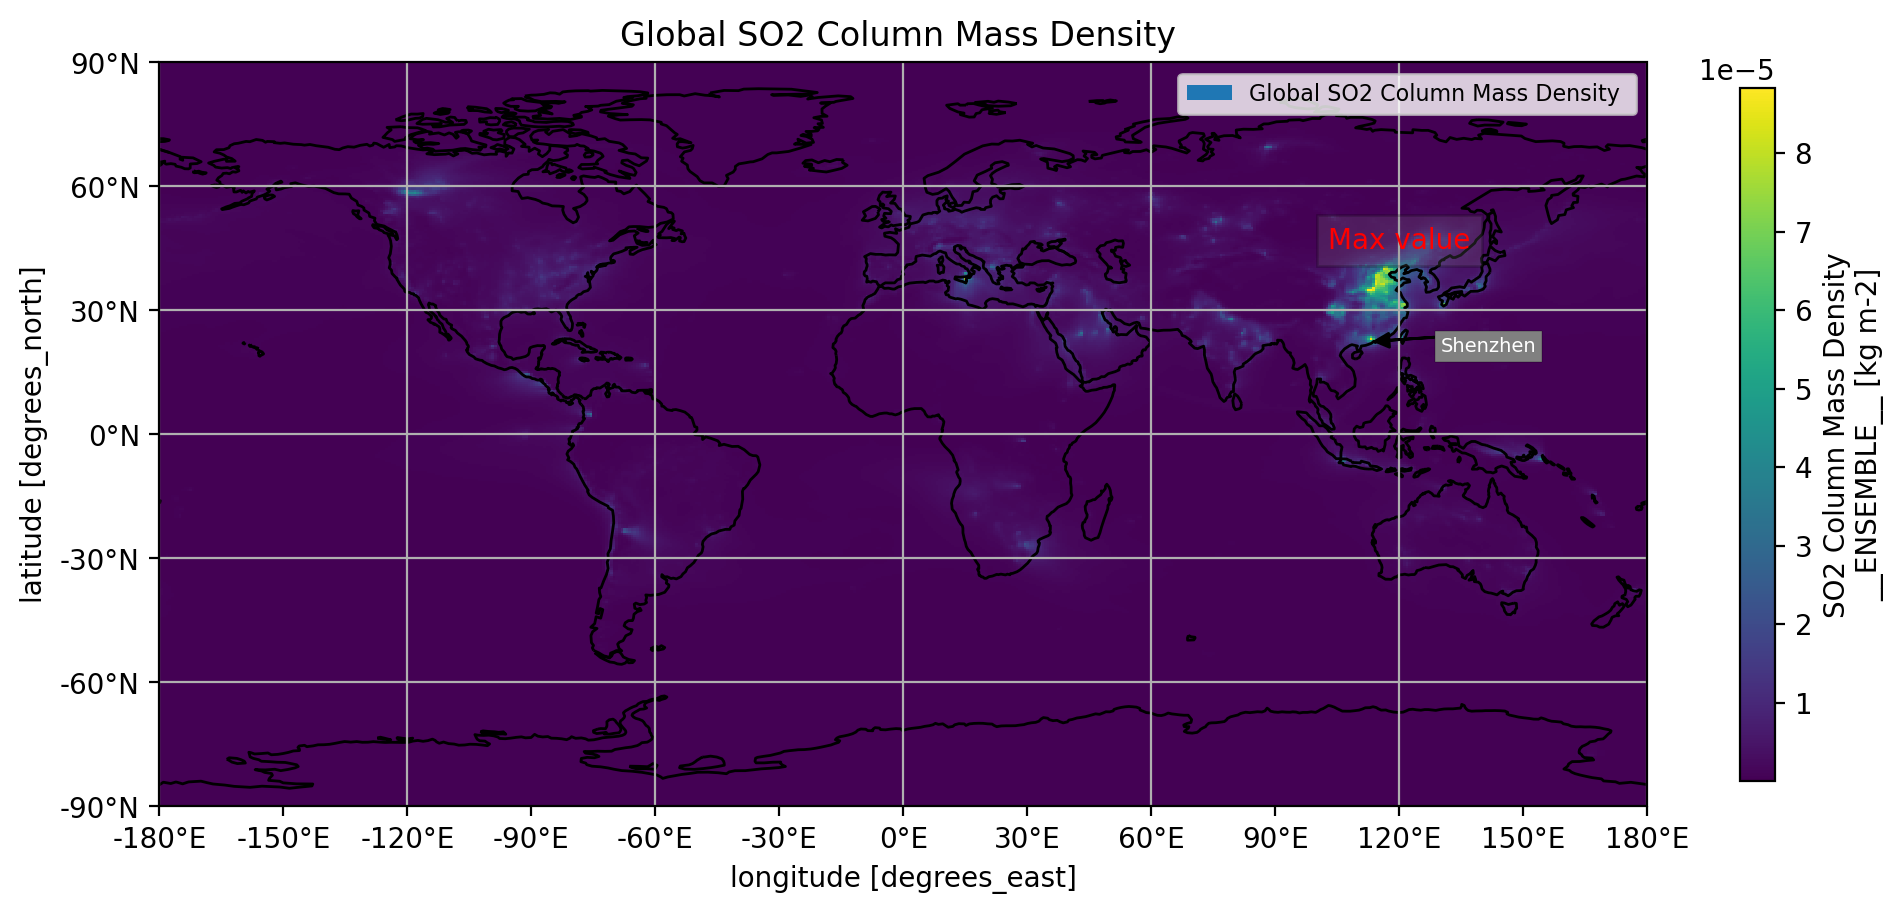

In [5]:
# use another variable

plt.figure(figsize=(12, 9),dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Add projection
Value = data.SO2CMASS.groupby('time.month')
Value.mean(dim=['time']).plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.5})

# Add gridlines, x label and ticks, y label and ticks
ax.gridlines()
ax.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(plt.FixedFormatter(['{}°E'.format(i) for i in range(-180, 181, 30)]))
ax.yaxis.set_major_formatter(plt.FixedFormatter(['{}°N'.format(i) for i in range(-90, 91, 30)]))

# Add title
plt.title('Global SO2 Column Mass Density ')

# Add annotate
ax.annotate('Shenzhen',xy=(114.06,22.54),xytext=(130,20),
             bbox=dict(boxstyle='square', fc='grey',linewidth=0.1),
             arrowprops=dict(facecolor='black', width=0.01,headwidth=5, headlength=5,shrink=0.005), 
             fontsize=7, color='white', horizontalalignment='left',
             transform=ccrs.PlateCarree())
# Add text
plt.text(120, 45, 'Max value', size = 10,
        horizontalalignment='center', color='red',
        bbox=dict(facecolor="grey",alpha=0.2),
        transform=ccrs.PlateCarree())

# Add legend
plt.legend(['Global SO2 Column Mass Density '],loc='best',fontsize=8)

plt.show()

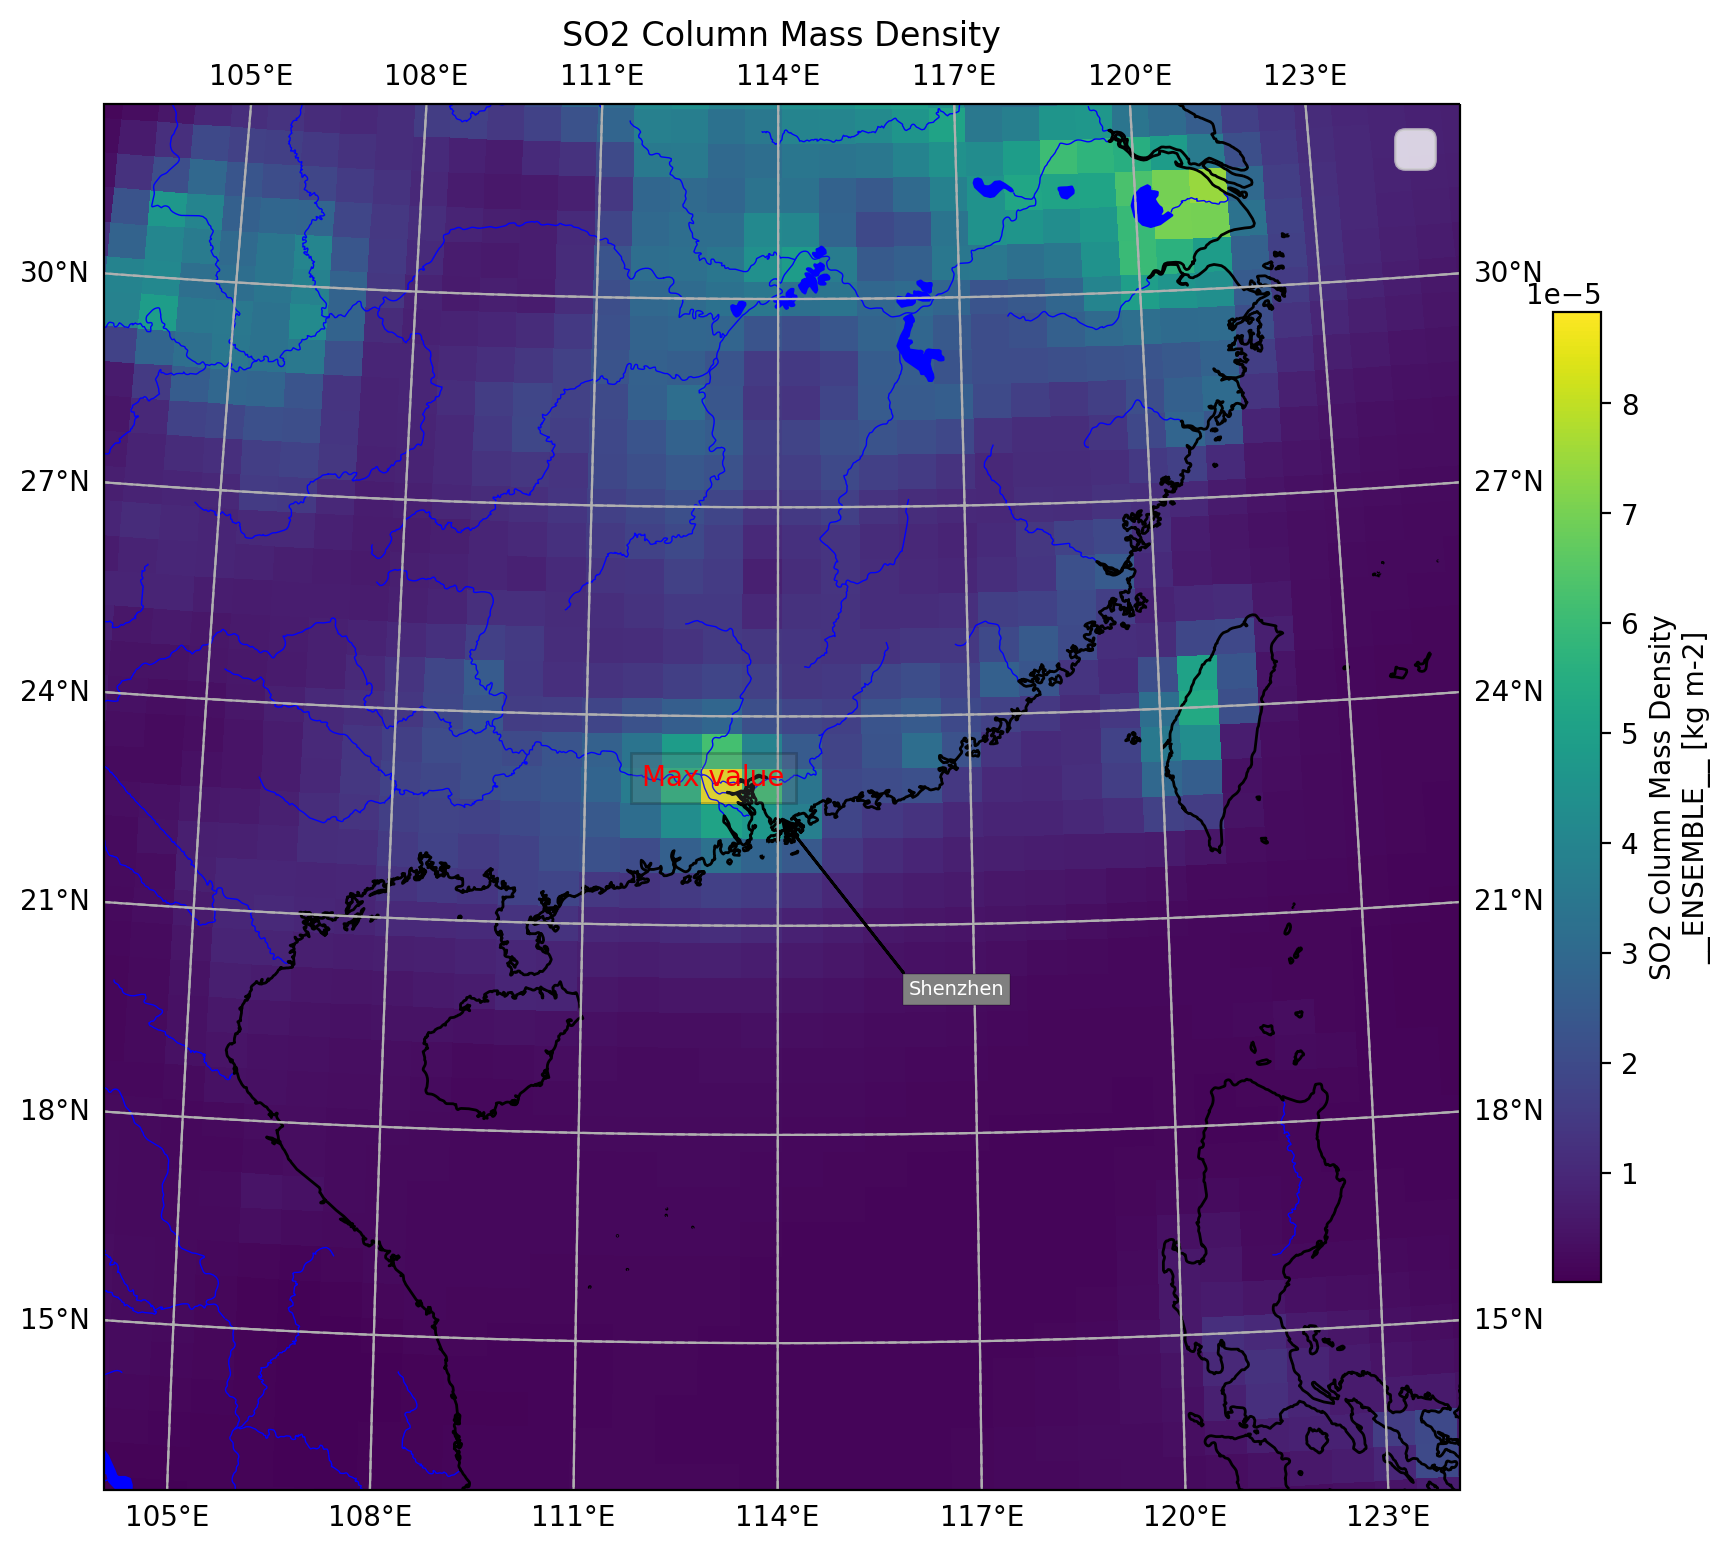

In [6]:
# 2.2
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

# Create and define the size of a figure object 
plt.figure(figsize=(12, 9), dpi=200)

# Set Orthographic projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)

# Add gridlines, x label and ticks, y label and ticks
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.xlocator = cticker.LongitudeLocator()
gl.ylocator = cticker.LatitudeLocator()
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(rivers_10m, facecolor='None', edgecolor='blue', linewidth=0.5)

# Add features to axes using coastlines method
ax.coastlines(resolution='10m')
ax.gridlines()
Value2 = data.SO2CMASS.groupby('time.month').mean(dim=['time'])
Value2.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.7})

# Add title
plt.title('SO2 Column Mass Density')

# Add annotate
ax.annotate('Shenzhen',xy=(114.06,22.54),xytext=(116,20),
             bbox=dict(boxstyle='square', fc='grey',linewidth=0.1),
             arrowprops=dict(facecolor='black', width=0.01,headwidth=5, headlength=5,shrink=0.005), 
             fontsize=7, color='white', horizontalalignment='left',
             transform=ccrs.PlateCarree())
# Add text
plt.text(113, 23, 'Max value', size = 10,
        horizontalalignment='center', color='red',
        bbox=dict(facecolor="grey",alpha=0.2),
        transform=ccrs.PlateCarree())

# Add legend
plt.legend(['SO2 Column Mass Density'],loc='best',fontsize=18)

plt.show()